In [47]:
# Import matplotlib and setup the figures to display within the notebook
%matplotlib inline
import matplotlib.pyplot as plt

[]

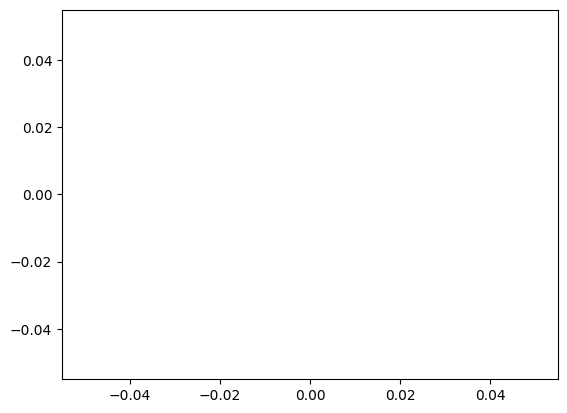

In [2]:
# Create a simple plot, without the semi-colon
plt.plot()

In [3]:
# Create some data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

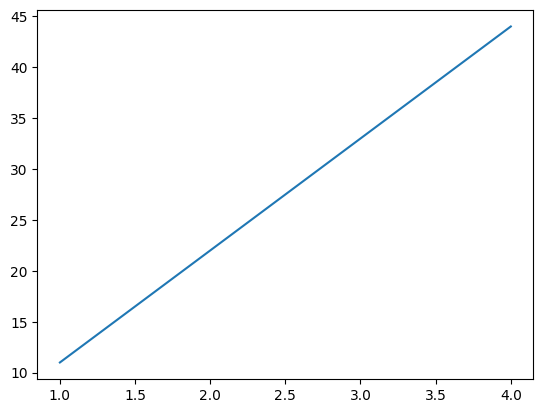

In [4]:
# With a semi-colon and now a y value
plt.plot(x, y);

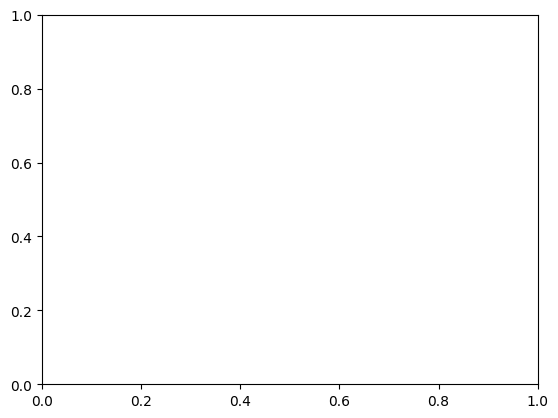

In [5]:
# Creating a plot with the OO verison, confusing way first
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

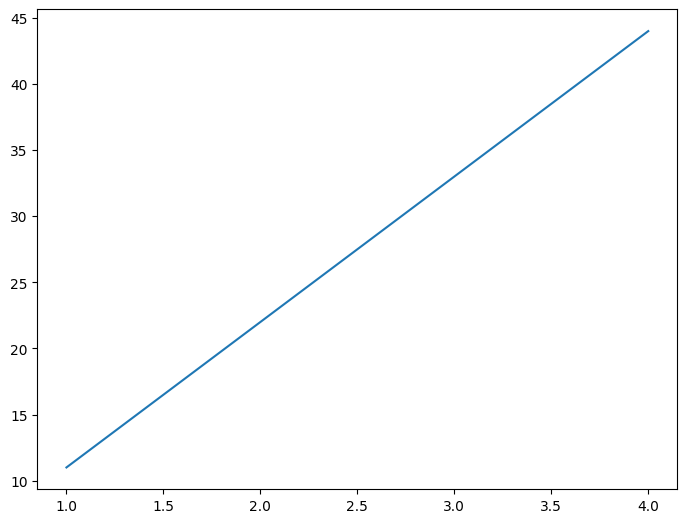

In [6]:
# Confusing #2
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

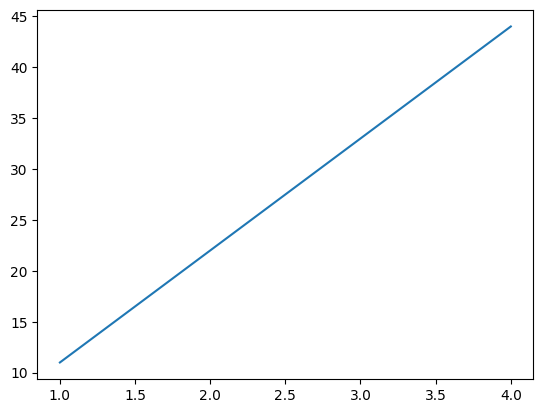

In [7]:
# Easier and more robust going forward (what we're going to use)
fig, ax = plt.subplots()
ax.plot(x, y);

In [8]:
# This is where the object orientated name comes from 
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

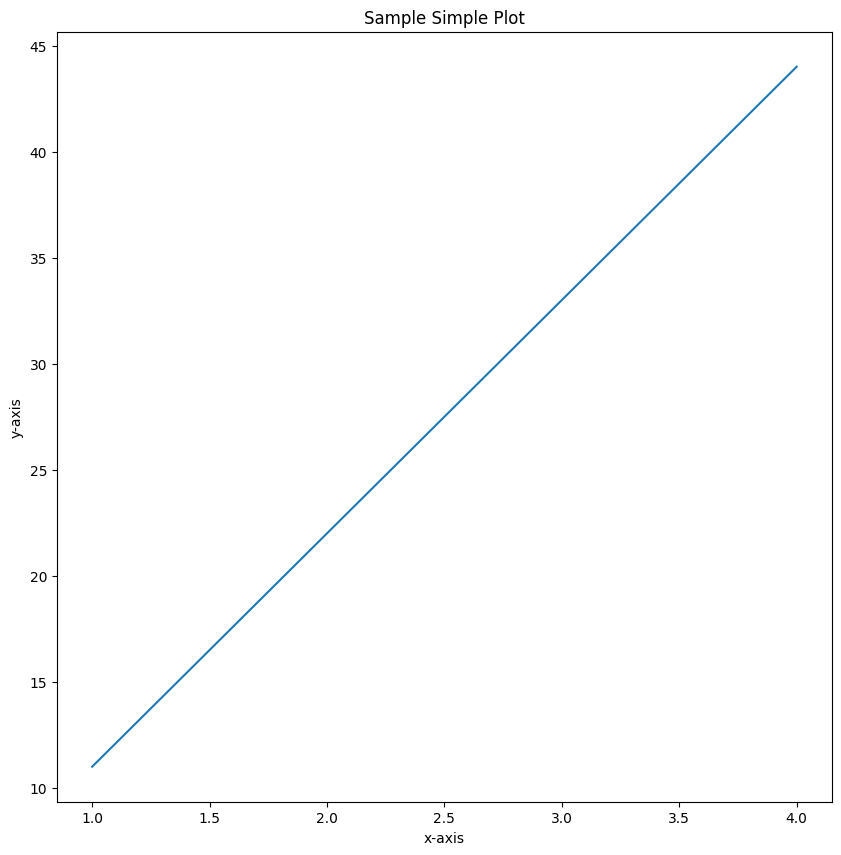

In [11]:
# A matplotlib workflow

# 0. Import and get matplotlib ready
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10))

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save & show
fig.savefig("D:/Downloads/done/simple-plot.png")

# 2. Making the most common type of plots using NumPy arrays
Most of figuring out what kind of plot to use is getting a feel for the data, then see what suits it best.

Matplotlib visualizations are built off NumPy arrays. So in this section we'll build some of the most common types of plots using NumPy arrays.

* line
* scatter
* bar
* hist
* subplots()

To make sure we have access to NumPy, we'll import it as np.

In [12]:
import numpy as np

# Line
Line is the default type of visualization in Matplotlib. Usually, unless specified otherwise, your plots will start out as lines.

In [13]:
# Create an array
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

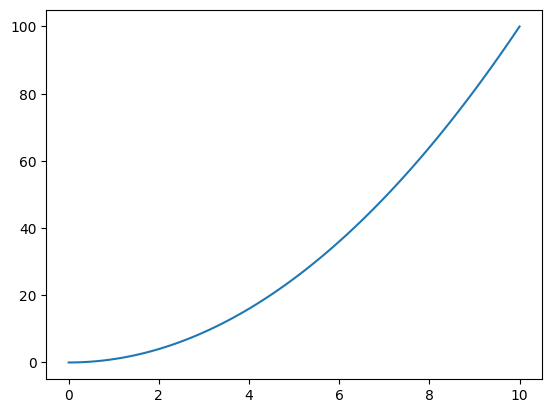

In [14]:
# The default plot is line
fig, ax = plt.subplots()
ax.plot(x, x**2);

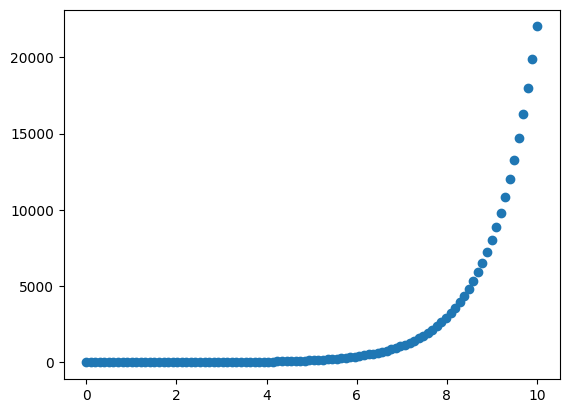

In [15]:
# Need to recreate our figure and axis instances when we want a new figure
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

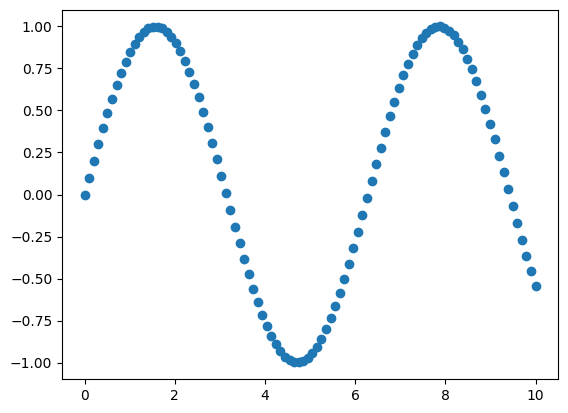

In [16]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

# Subplots
* Multiple plots on one figure
https://matplotlib.org/3.1.1/gallery/recipes/create_subplots.html

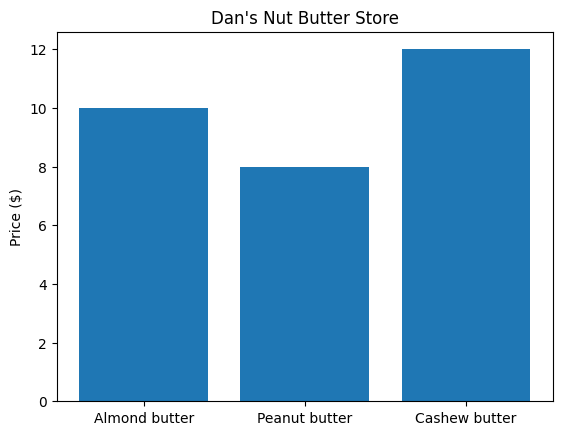

In [18]:
# You can make plots from a dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");

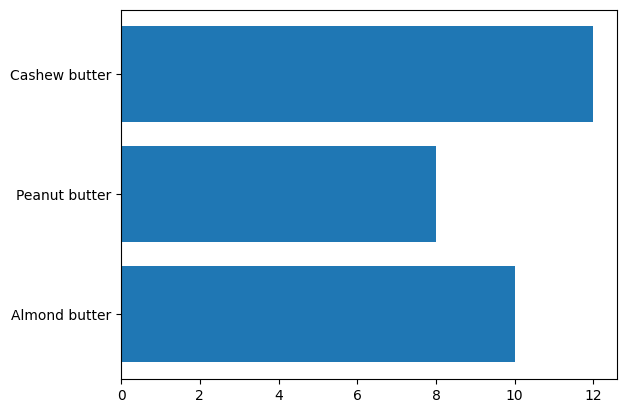

In [19]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

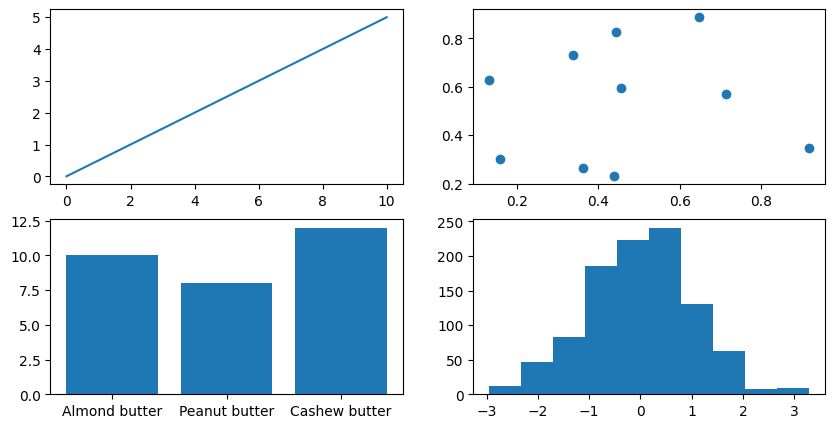

In [20]:
# Option 1: Create multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(10, 5))

# Plot data to each axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

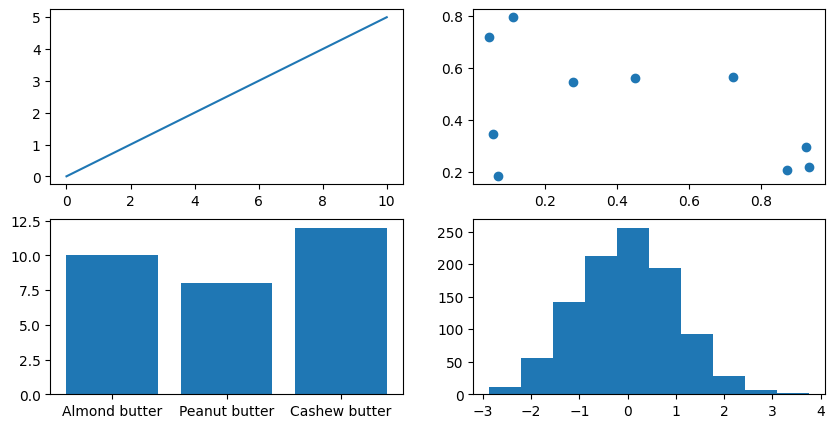

In [21]:
# Option 2: Create multiple subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Index to plot data
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

In [22]:
import pandas as pd

In [23]:
# Let's import the car_sales dataset
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


# Line
* Concept
* DataFrame

Often, reading things won't make sense. Practice writing code for yourself, get it out of the docs and into your workspace. See what happens when you run it.

Let's start with trying to replicate the pandas visualization documents.

In [24]:
# Start with some dummy data
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2020', periods=1000))
ts

2020-01-01   -0.232696
2020-01-02    1.790954
2020-01-03    1.268711
2020-01-04    0.129549
2020-01-05    0.371848
                ...   
2022-09-22    2.773754
2022-09-23    0.454667
2022-09-24   -0.213383
2022-09-25    1.680020
2022-09-26   -0.196853
Freq: D, Length: 1000, dtype: float64

In [25]:
# What does cumsum() do?
ts.cumsum()

2020-01-01    -0.232696
2020-01-02     1.558258
2020-01-03     2.826968
2020-01-04     2.956517
2020-01-05     3.328365
                ...    
2022-09-22   -24.802694
2022-09-23   -24.348026
2022-09-24   -24.561410
2022-09-25   -22.881390
2022-09-26   -23.078242
Freq: D, Length: 1000, dtype: float64

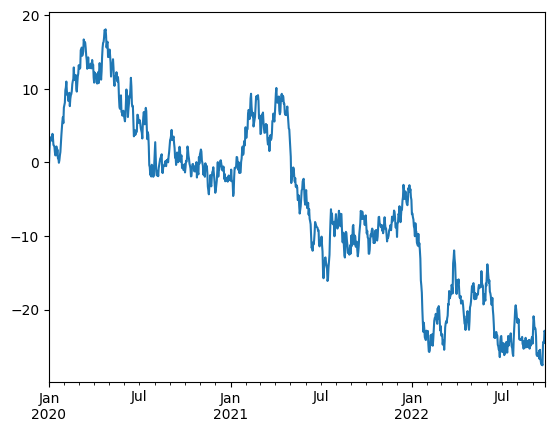

In [26]:
ts.cumsum().plot();

# Working with actual data
Let's do a little data manipulation on our car_sales DataFrame.

In [27]:
# Remove price column symbols
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [28]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000."
1,Honda,Red,87899,4,"$5,000."
2,Toyota,Blue,32549,3,"$7,000."
3,BMW,Black,11179,5,"$22,000."
4,Nissan,White,213095,4,"$3,500."
5,Toyota,Green,99213,4,"$4,500."
6,Honda,Blue,45698,4,"$7,500."
7,Honda,Blue,54738,4,"$7,000."
8,Toyota,White,60000,4,"$6,250."
9,Nissan,White,31600,4,"$9,700."


In [29]:
# Add a date column
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales


,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,"$4,000.",2020-01-01
1,Honda,Red,87899,4,"$5,000.",2020-01-02
2,Toyota,Blue,32549,3,"$7,000.",2020-01-03
3,BMW,Black,11179,5,"$22,000.",2020-01-04
4,Nissan,White,213095,4,"$3,500.",2020-01-05
5,Toyota,Green,99213,4,"$4,500.",2020-01-06
6,Honda,Blue,45698,4,"$7,500.",2020-01-07
7,Honda,Blue,54738,4,"$7,000.",2020-01-08
8,Toyota,White,60000,4,"$6,250.",2020-01-09
9,Nissan,White,31600,4,"$9,700.",2020-01-10


In [35]:
# Make total sales column (doesn't work, adds as string)
#car_sales["Total Sales"] = car_sales["Price"].cumsum()

# Oops... want them as int's not string
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '').astype(int)
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

ValueError: invalid literal for int() with base 10: '$4,000.'

In [33]:
# Convert Price to int
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer (KM)", y="Price", kind='scatter');

ValueError: invalid literal for int() with base 10: '$4,000.'

In [37]:
# Let's try with another dataset
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


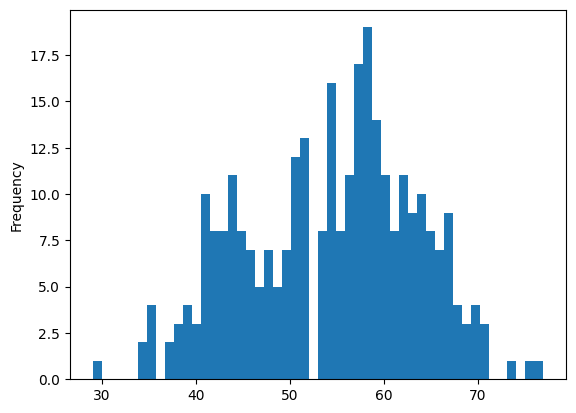

In [38]:
heart_disease["age"].plot.hist(bins=50);

# Subplots
* Concept
* DataFrame

In [39]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


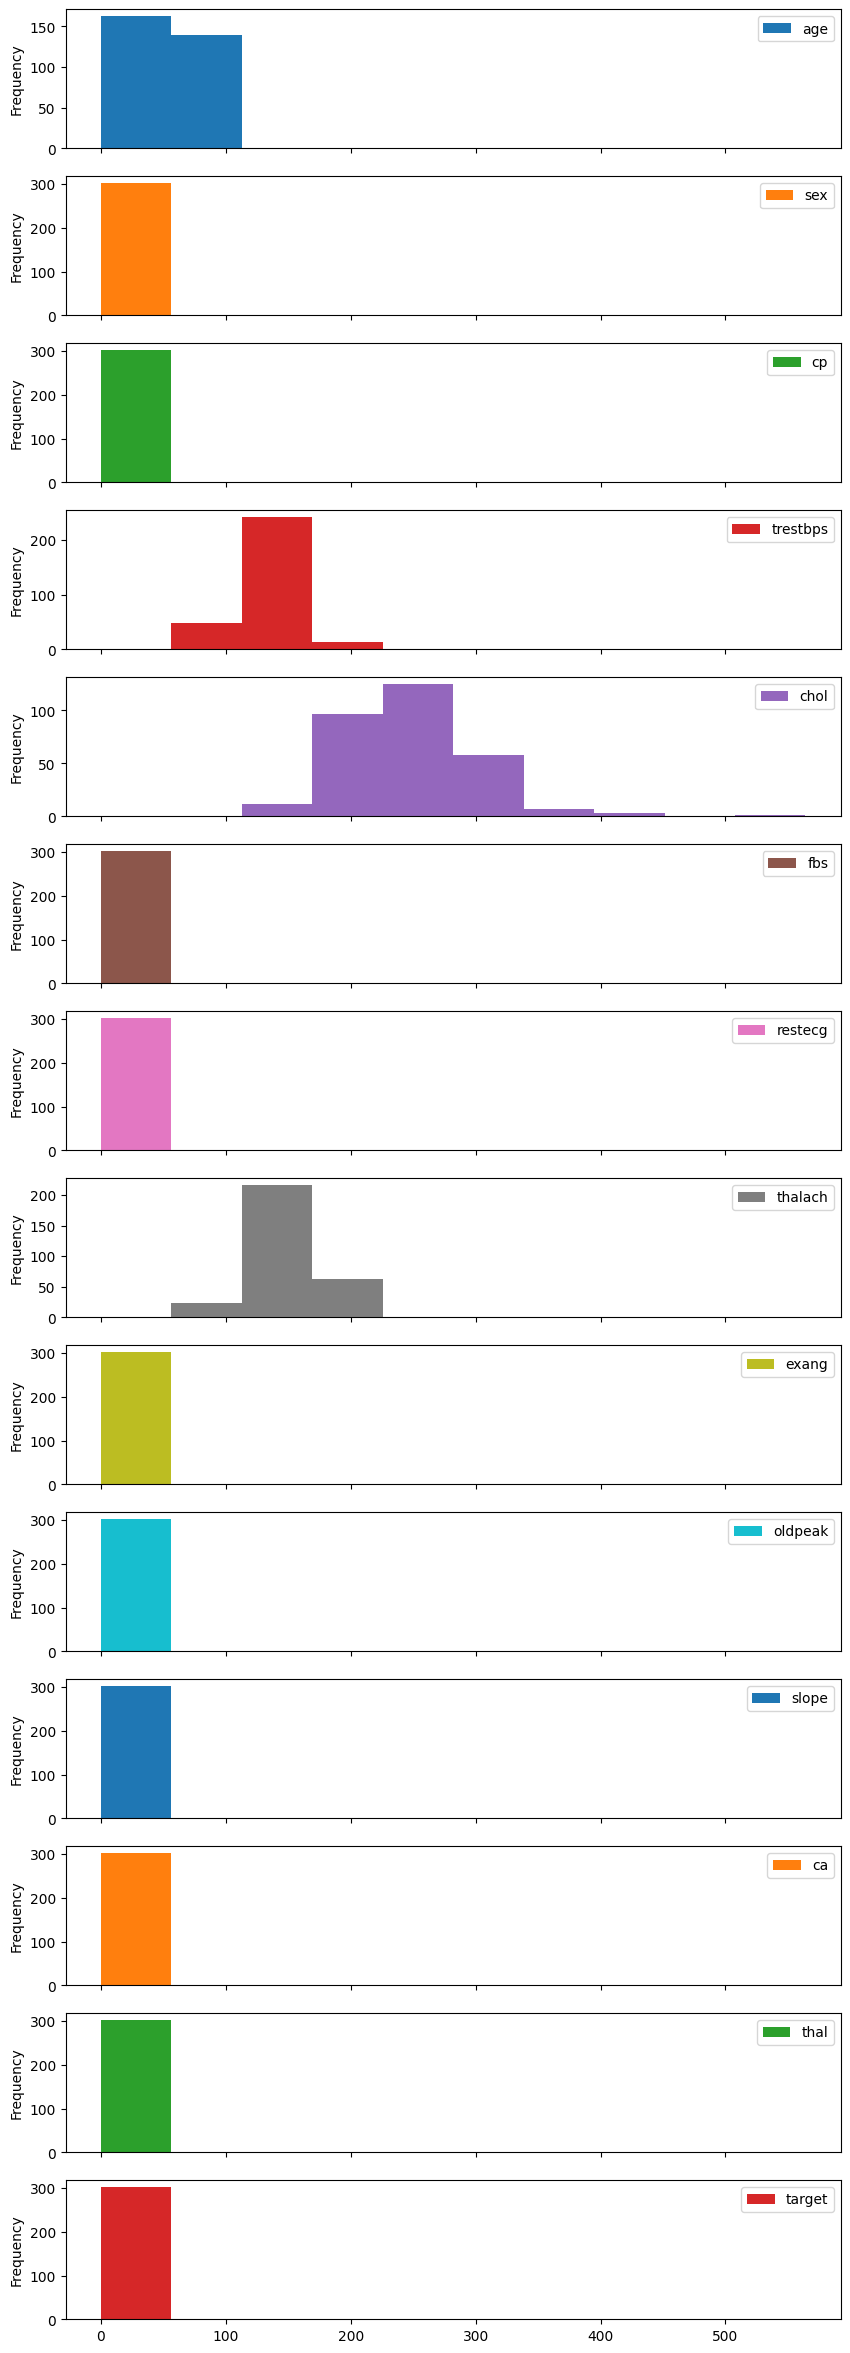

In [40]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

# 4. Plotting with pandas using the OO method
For more complicated plots, you'll want to use the OO method.

In [41]:
# Perform data analysis on patients over 50
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


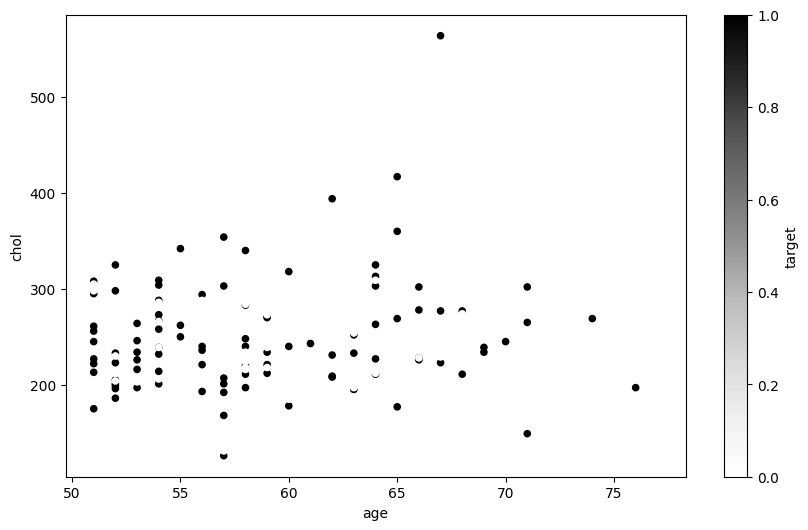

In [42]:
over_50.plot(kind='scatter', 
             x='age', 
             y='chol', 
             c='target', 
             figsize=(10, 6));

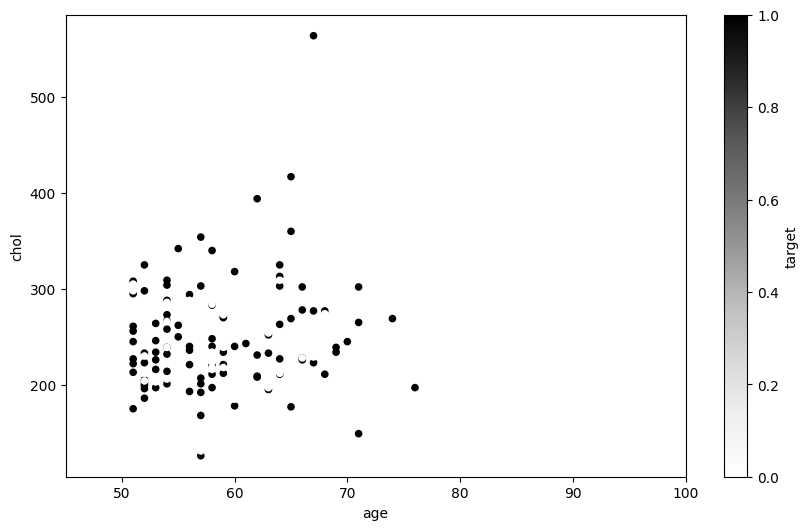

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter', 
             x="age", 
             y="chol", 
             c='target', 
             ax=ax);
ax.set_xlim([45, 100]);

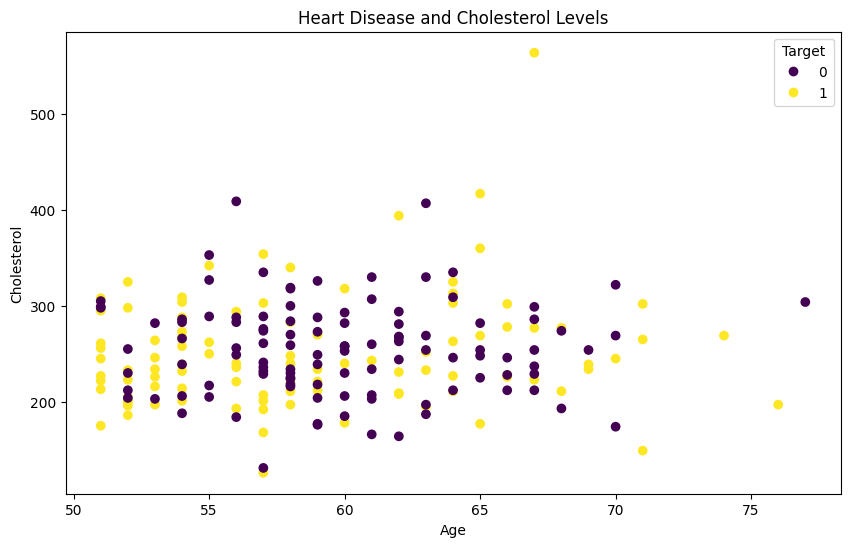

In [44]:
# Make a bit more of a complicated plot

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.legend(*scatter.legend_elements(), title="Target");

What if we wanted a horizontal line going across with the mean of heart_disease["chol"]?

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axhline.html

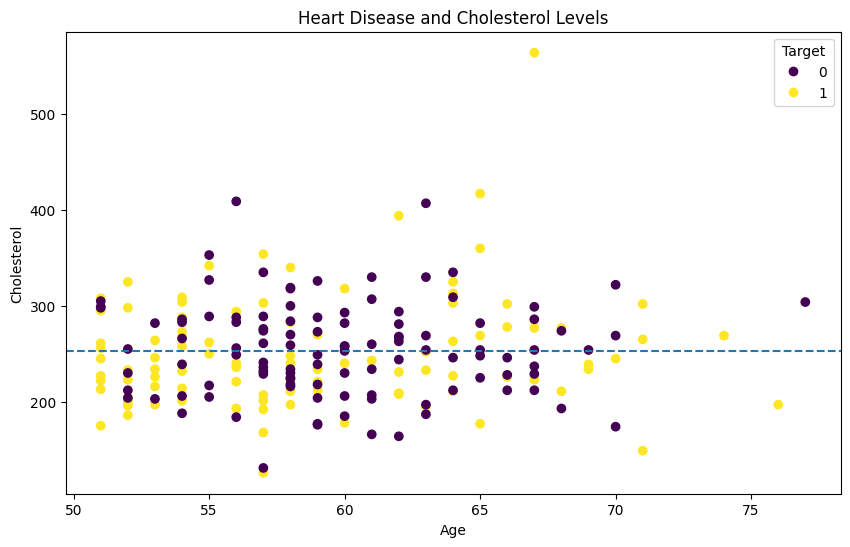

In [45]:
# Make a bit more of a complicated plot

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax.axhline(over_50["chol"].mean(),
           linestyle="--");

Adding another plot to existing styled one

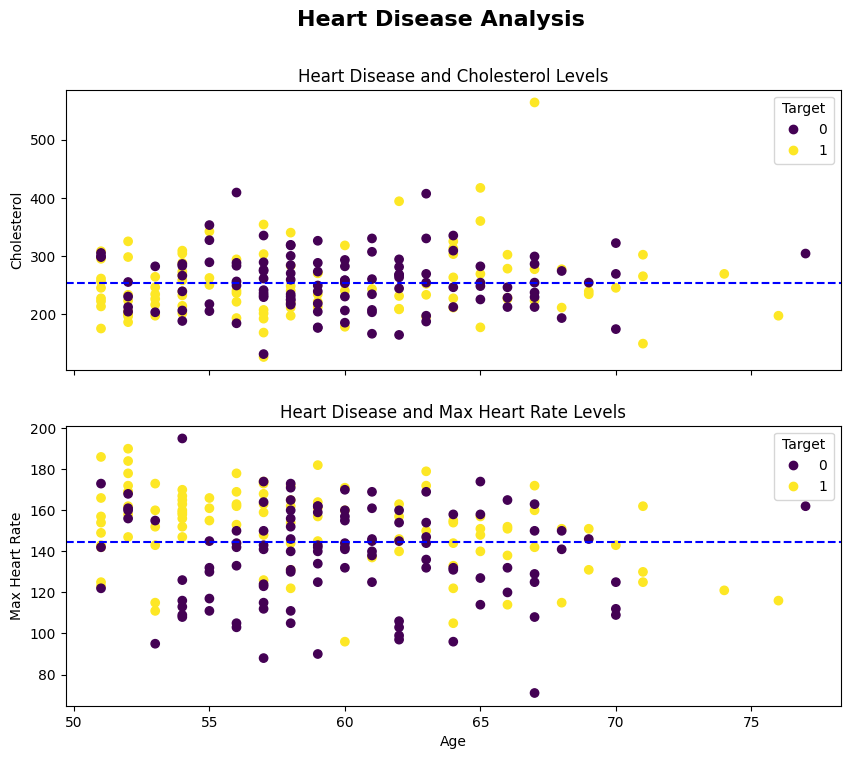

In [46]:
# Setup plot (2 rows, 1 column)
fig, (ax0, ax1) = plt.subplots(nrows=2, # 2 rows
                               ncols=1, 
                               sharex=True, 
                               figsize=(10, 8))

# Add data for ax0
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"])
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")
ax0.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")


# Add data for ax1
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")
ax1.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');